# **Метрики удобочитаемости, лексического разнообразия и пр. для датасета**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import colorsys

## Объединение данных в один датасет

In [2]:
# Читаем несколько файлов с метриками (для разных авторов)
df1 = pd.read_csv('dataset_part1.csv', sep=',') 
df1.index = df1['Unnamed: 0']
df1['author'].unique()

array(['anton-chekhov', 'dmitriy-mamin-sibiryak', 'fedor-dostoevskii',
       'ivan-goncharov', 'ivan-turgenev', 'lev-tolstoi'], dtype=object)

In [3]:
df2 = pd.read_csv('dataset_part2.csv', sep=',')
df2.index = df2['Unnamed: 0']
df2['author'].unique()

array(['lev-tolstoi', 'maksim-gorkii'], dtype=object)

In [4]:
df3 = pd.read_csv('dataset_part3.csv', sep=',')
df3.index = df3['Unnamed: 0']
df3['author'].unique()

array(['maksim-gorkii', 'nikolai-gogol', 'sergey-aksakov'], dtype=object)

In [5]:
#Делаем общий датасет для всех авторов
df = df1.append(df2).append(df3)

In [6]:
df['author'].unique()

array(['anton-chekhov', 'dmitriy-mamin-sibiryak', 'fedor-dostoevskii',
       'ivan-goncharov', 'ivan-turgenev', 'lev-tolstoi', 'maksim-gorkii',
       'nikolai-gogol', 'sergey-aksakov'], dtype=object)

In [7]:
#Удаляем одинаковые строки в объединенном датасете
df = df.drop_duplicates(['Unnamed: 0'])
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
#Показатели среднего/женского/мужского рода, пассивного/активного залога и т.д. выражаем как долю от общего числа слов в главе
for column in ['neut',
       'masc', 'femn', 'plur','sing', 'pres', 'past', 'futr', 'pssv', 'actv', '2per',
       '3per', '1per']:
    df[column] = df[column] / df['n_words']

In [9]:
books = df

## Часть 1: Изучить особенности данных

### 1.1 Основные статистики для всех признаков

In [10]:
df.describe(include='all')

,n_sents,n_words,n_unique_words,n_long_words,n_complex_words,n_simple_words,n_monosyllable_words,n_polysyllable_words,n_chars,n_letters,...,mamtld,hdd,simpson_index,hapax_index,author,1per,2per,futr,past,pssv
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2.036000e+03,2036.000000,...,2036.000000,2036.000000,2036.000000,2036.000000,2036,1824.000000,1679.000000,1812.000000,2015.000000,1911.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,lev-tolstoi,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,747,NaN,NaN,NaN,NaN,NaN
mean,129.905697,2319.201375,943.064342,959.969057,326.750982,1851.349705,700.290766,1477.809921,1.463957e+04,11514.990177,...,178.041701,0.888772,167.305318,1351.187836,NaN,0.035519,0.020374,0.012013,0.101350,0.009032
std,327.975848,6608.464037,1558.548883,3000.992001,1036.824003,5272.056270,1824.574326,4496.687108,4.370152e+04,34642.677192,...,97.510938,0.169669,51.547013,307.675386,NaN,0.026570,0.016433,0.008477,0.037095,0.008451
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,7.000000e+00,7.000000,...,1.000000,-1.000000,0.000000,0.000000,NaN,0.000674,0.000189,0.000685,0.003922,0.000331
25%,32.000000,614.250000,375.000000,255.750000,83.000000,479.000000,170.000000,391.750000,3.905250e+03,3089.500000,...,126.037215,0.895151,141.977478,1191.471162,NaN,0.014959,0.007866,0.006289,0.081075,0.004195
50%,63.000000,1131.500000,617.500000,476.000000,161.000000,890.000000,325.500000,720.500000,7.146000e+03,5595.500000,...,177.590762,0.907327,163.445148,1320.332311,NaN,0.029885,0.016522,0.010265,0.107843,0.006737
75%,126.000000,2001.000000,994.000000,845.000000,291.000000,1591.500000,619.500000,1278.250000,1.256675e+04,9976.250000,...,232.670872,0.917278,189.706356,1468.576565,NaN,0.051511,0.029687,0.015522,0.127197,0.010309


In [11]:
df['author'].value_counts()

lev-tolstoi               747
ivan-turgenev             333
fedor-dostoevskii         279
nikolai-gogol             206
anton-chekhov             186
maksim-gorkii             100
dmitriy-mamin-sibiryak     96
ivan-goncharov             57
sergey-aksakov             32
Name: author, dtype: int64

### 1.2 Пропущенные значения

In [12]:
# Посмотрим, какую долю занимают пропущенные значения для каждого признака от общего числа объектов
books.isna().sum()/len(df)

n_sents                        0.000000
n_words                        0.000000
n_unique_words                 0.000000
n_long_words                   0.000000
n_complex_words                0.000000
n_simple_words                 0.000000
n_monosyllable_words           0.000000
n_polysyllable_words           0.000000
n_chars                        0.000000
n_letters                      0.000000
n_spaces                       0.000000
n_syllables                    0.000000
n_punctuations                 0.000000
flesch_kincaid_grade           0.000000
flesch_reading_easy            0.000000
coleman_liau_index             0.000000
smog_index                     0.000000
automated_readability_index    0.000000
lix                            0.000000
Unnamed: 20                    0.000000
femn                           0.000982
masc                           0.000491
neut                           0.001965
plur                           0.003438
sing                           0.000000


* В данном случае пропущенные значения присутствуют в показателях: женского/мужского/нейтрального родов, множественного числа, настоящего/прошедшего/будущего времен, активного/пассивного залогов, первого/второго/третьего лиц. 
* Для каждого из этих показателей пропущенное значение означает, что этот род/число/время/залог/лицо не были использованы и найдены в тексте. 
* Это означает, что пропущенные значения **можно заменять на нули**.

In [13]:
books = books.fillna(value=0)

In [14]:
books.describe()

,n_sents,n_words,n_unique_words,n_long_words,n_complex_words,n_simple_words,n_monosyllable_words,n_polysyllable_words,n_chars,n_letters,...,mtld,mamtld,hdd,simpson_index,hapax_index,1per,2per,futr,past,pssv
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2.036000e+03,2036.000000,...,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,129.905697,2319.201375,943.064342,959.969057,326.750982,1851.349705,700.290766,1477.809921,1.463957e+04,11514.990177,...,197.577736,178.041701,0.888772,167.305318,1351.187836,0.031820,0.016802,0.010691,0.100305,0.008477
std,327.975848,6608.464037,1558.548883,3000.992001,1036.824003,5272.056270,1824.574326,4496.687108,4.370152e+04,34642.677192,...,82.880087,97.510938,0.169669,51.547013,307.675386,0.027389,0.016814,0.008837,0.038298,0.008469
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,7.000000e+00,7.000000,...,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,614.250000,375.000000,255.750000,83.000000,479.000000,170.000000,391.750000,3.905250e+03,3089.500000,...,141.719006,126.037215,0.895151,141.977478,1191.471162,0.009563,0.002836,0.004531,0.079978,0.003799
50%,63.000000,1131.500000,617.500000,476.000000,161.000000,890.000000,325.500000,720.500000,7.146000e+03,5595.500000,...,184.227211,177.590762,0.907327,163.445148,1320.332311,0.025915,0.012542,0.009226,0.107028,0.006401
75%,126.000000,2001.000000,994.000000,845.000000,291.000000,1591.500000,619.500000,1278.250000,1.256675e+04,9976.250000,...,239.153639,232.670872,0.917278,189.706356,1468.576565,0.048066,0.026140,0.014685,0.126921,0.009952
max,7286.000000,170197.000000,33087.000000,80175.000000,27654.000000,135233.000000,44097.000000,118790.000000,1.147321e+06,911997.000000,...,705.740000,718.113462,0.983501,1242.500000,6386.841303,0.225352,0.117647,0.073171,0.222222,0.069444


### 1.3 Ошибочные значения и выбросы

Сначала посмотрим на boxplot.

In [15]:
books.columns

Index(['n_sents', 'n_words', 'n_unique_words', 'n_long_words',
       'n_complex_words', 'n_simple_words', 'n_monosyllable_words',
       'n_polysyllable_words', 'n_chars', 'n_letters', 'n_spaces',
       'n_syllables', 'n_punctuations', 'flesch_kincaid_grade',
       'flesch_reading_easy', 'coleman_liau_index', 'smog_index',
       'automated_readability_index', 'lix', 'Unnamed: 20', 'femn', 'masc',
       'neut', 'plur', 'sing', 'pres', 'actv', '3per', 'ttr', 'rttr', 'cttr',
       'httr', 'sttr', 'mttr', 'dttr', 'mattr', 'msttr', 'mtld', 'mamtld',
       'hdd', 'simpson_index', 'hapax_index', 'author', '1per', '2per', 'futr',
       'past', 'pssv'],
      dtype='object')

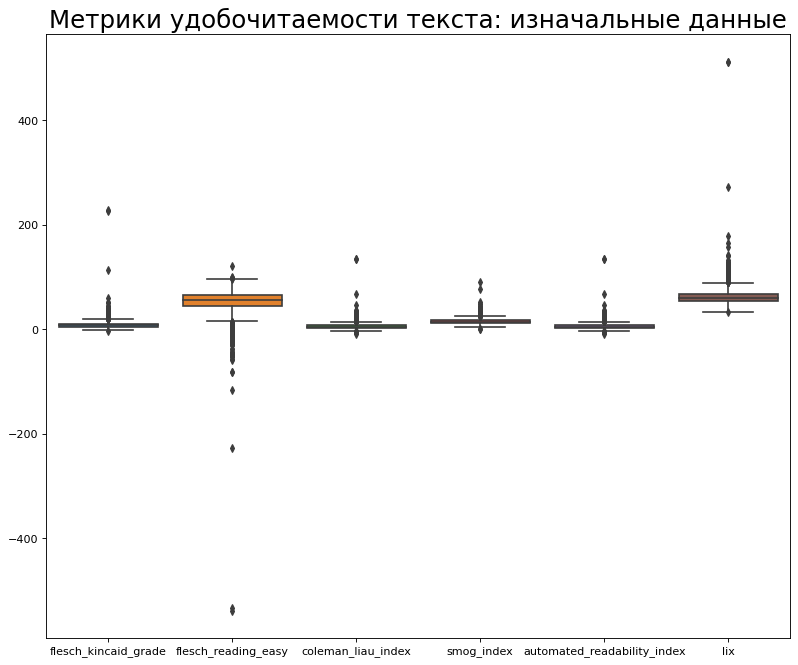

In [16]:
plt.figure(figsize=(12,10), dpi=80)
sns.boxplot(data=books[['flesch_kincaid_grade', 'flesch_reading_easy', 'coleman_liau_index',
       'smog_index', 'automated_readability_index', 'lix']])
plt.title('Метрики удобочитаемости текста: изначальные данные', fontsize=22)
plt.show()

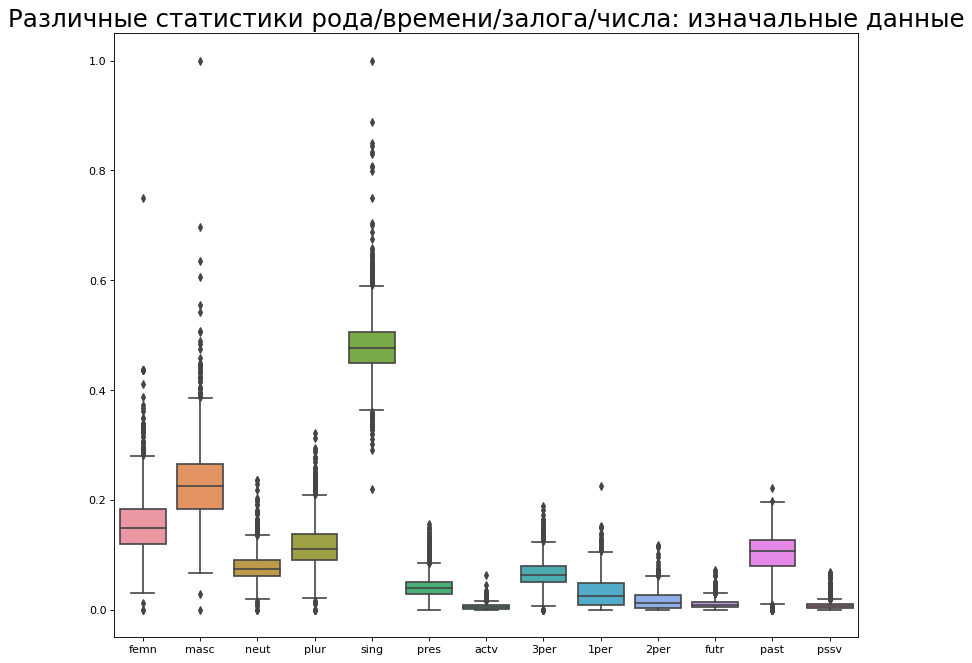

In [17]:
plt.figure(figsize=(12,10), dpi=80)
sns.boxplot(data=books[['femn', 'masc',
       'neut', 'plur', 'sing', 'pres', 'actv', '3per', '1per', '2per', 'futr',
       'past', 'pssv']])
plt.title('Различные статистики рода/времени/залога/числа: изначальные данные', fontsize=22)
plt.show()

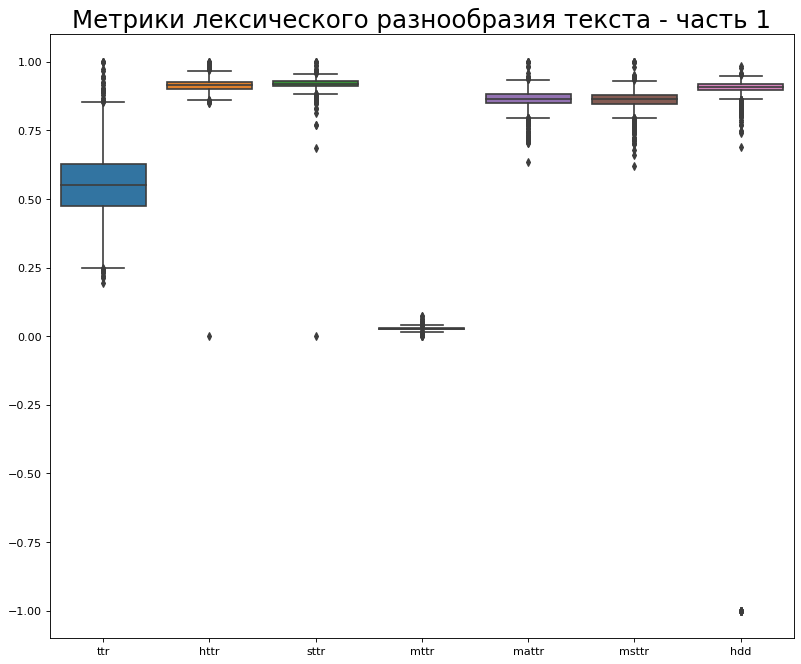

In [18]:
plt.figure(figsize=(12,10), dpi=80)
sns.boxplot(data=books[['ttr',
       'httr', 'sttr', 'mttr', 'mattr', 'msttr',
       'hdd']])
plt.title('Метрики лексического разнообразия текста - часть 1', fontsize=22)
plt.show()

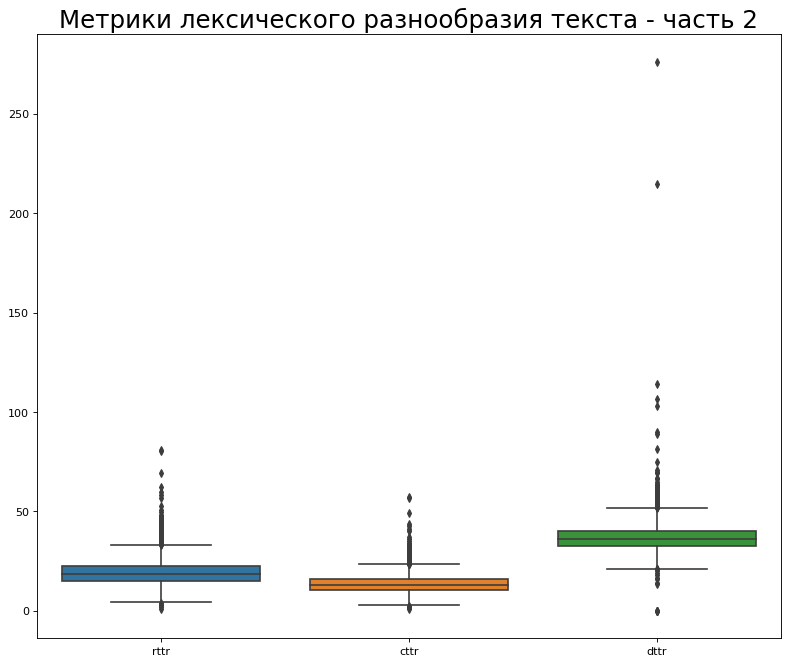

In [19]:
plt.figure(figsize=(12,10), dpi=80)
sns.boxplot(data=books[['rttr', 'cttr', 'dttr']])
plt.title('Метрики лексического разнообразия текста - часть 2', fontsize=22)
plt.show()

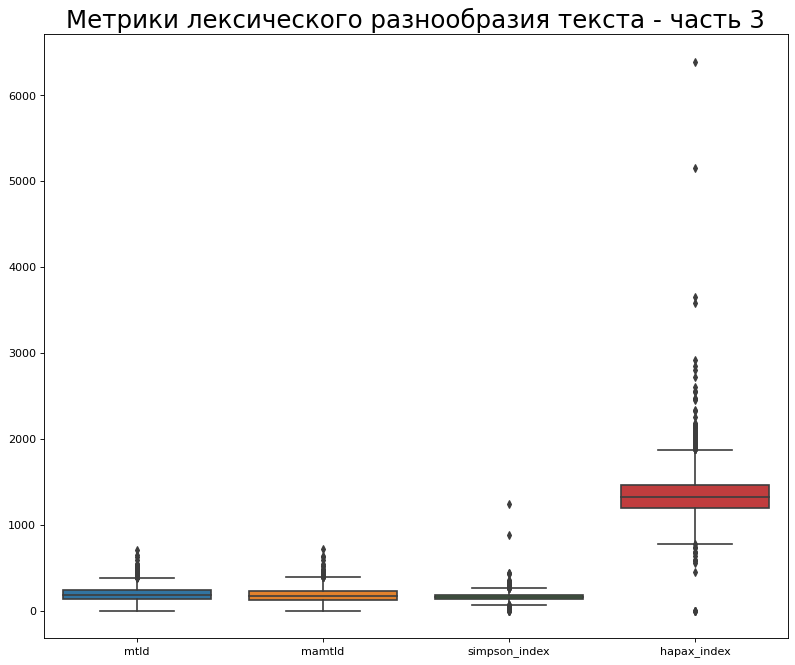

In [20]:
plt.figure(figsize=(12,10), dpi=80)
sns.boxplot(data=books[['mtld', 'mamtld', 'simpson_index', 'hapax_index']])
plt.title('Метрики лексического разнообразия текста - часть 3', fontsize=22)
plt.show()

In [21]:
books[books['flesch_reading_easy']==min(books['flesch_reading_easy'])]

,n_sents,n_words,n_unique_words,n_long_words,n_complex_words,n_simple_words,n_monosyllable_words,n_polysyllable_words,n_chars,n_letters,...,mamtld,hdd,simpson_index,hapax_index,author,1per,2per,futr,past,pssv
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
nesvoevremennye-mysli-zametki-o-revolyucii-i-kulture. Text/chapter37.xhtml,1.0,461.0,304.0,230.0,106.0,335.0,124.0,317.0,3190.0,2638.0,...,177.473094,0.911308,167.503949,1208.604599,maksim-gorkii,0.008677,0.0,0.006508,0.0282,0.006508


In [22]:
#В главу вынесено всего одно предложение, поэтому статистики рассчитаны не очень корректно для этого объекта, и его можно удалить
books = books.drop(['nesvoevremennye-mysli-zametki-o-revolyucii-i-kulture. Text/chapter37.xhtml'])

In [23]:
books[books['flesch_reading_easy']==min(books['flesch_reading_easy'])]

,n_sents,n_words,n_unique_words,n_long_words,n_complex_words,n_simple_words,n_monosyllable_words,n_polysyllable_words,n_chars,n_letters,...,mamtld,hdd,simpson_index,hapax_index,author,1per,2per,futr,past,pssv
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
nesvoevremennye-mysli-zametki-o-revolyucii-i-kulture. Text/chapter43.xhtml,1.0,466.0,323.0,215.0,76.0,362.0,120.0,318.0,3142.0,2545.0,...,350.209537,0.910597,157.021739,1486.014916,maksim-gorkii,0.042918,0.0,0.025751,0.027897,0.017167


In [24]:
#Видимо, есть еще несколько таких небольшиъ выбросов,
 #где в главу выделено всего одно предложение, поэтому можно изучить этот признак для всего датасета

books['n_sents'].value_counts()

6.0      41
5.0      36
7.0      34
8.0      26
48.0     25
         ..
265.0     1
127.0     1
212.0     1
281.0     1
492.0     1
Name: n_sents, Length: 403, dtype: int64

In [25]:
# Оставим только главы, где есть хотя бы 20 предложений
books = books[books['n_sents'] > 19]

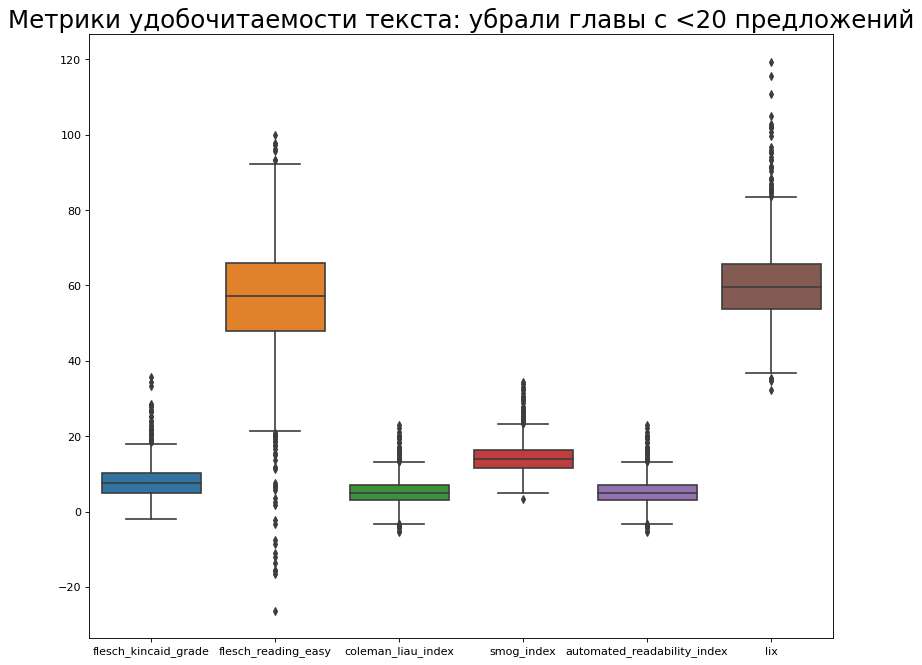

In [26]:
# Посмотрим график заново
plt.figure(figsize=(12,10), dpi=80)
sns.boxplot(data=books[['flesch_kincaid_grade', 'flesch_reading_easy', 'coleman_liau_index',
       'smog_index', 'automated_readability_index', 'lix']])
plt.title('Метрики удобочитаемости текста: убрали главы с <20 предложений', fontsize=22)
plt.show()

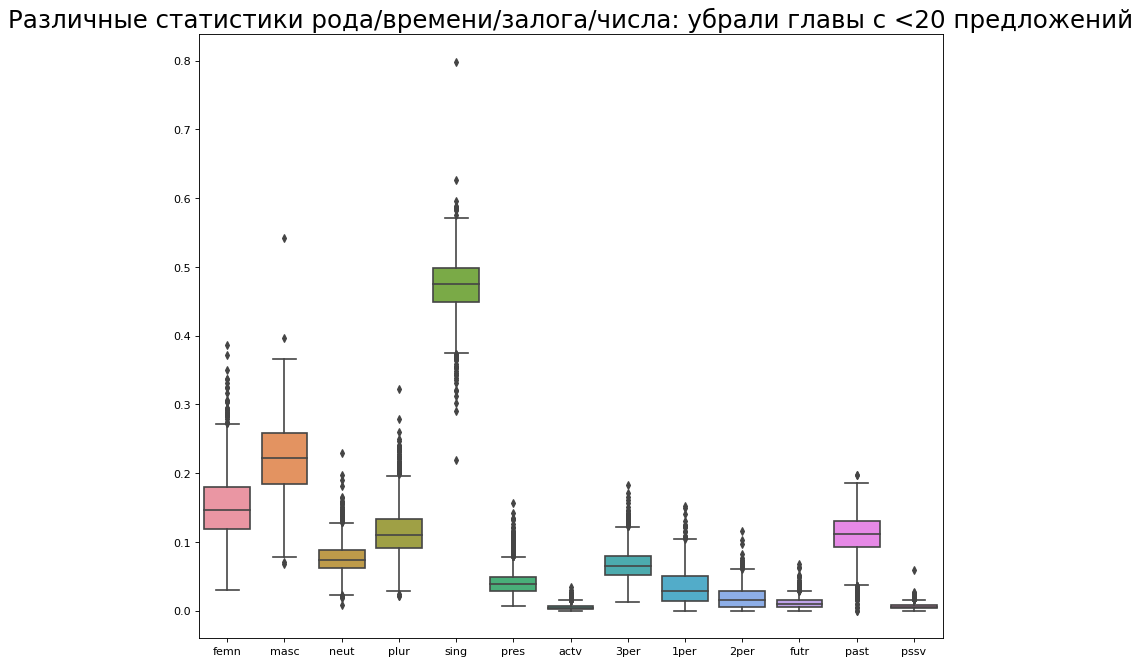

In [27]:
plt.figure(figsize=(12,10), dpi=80)
sns.boxplot(data=books[['femn', 'masc',
       'neut', 'plur', 'sing', 'pres', 'actv', '3per', '1per', '2per', 'futr',
       'past', 'pssv']])
plt.title('Различные статистики рода/времени/залога/числа: убрали главы с <20 предложений', fontsize=22)
plt.show()

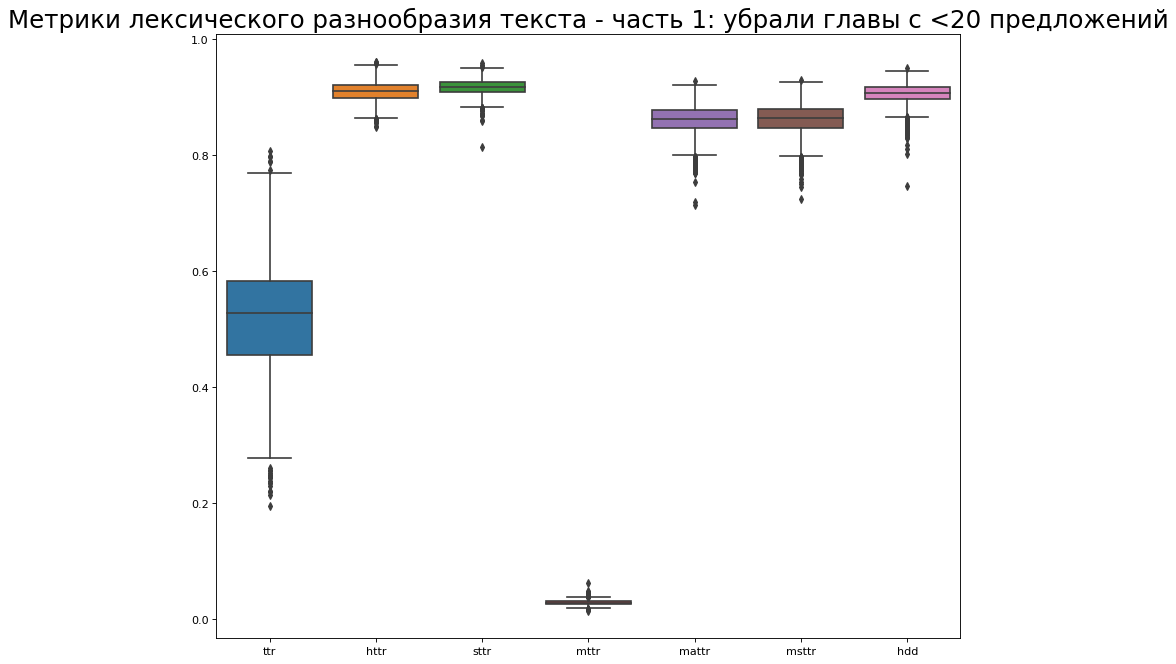

In [28]:
plt.figure(figsize=(12,10), dpi=80)
sns.boxplot(data=books[['ttr',
       'httr', 'sttr', 'mttr', 'mattr', 'msttr',
       'hdd']])
plt.title('Метрики лексического разнообразия текста - часть 1: убрали главы с <20 предложений', fontsize=22)
plt.show()

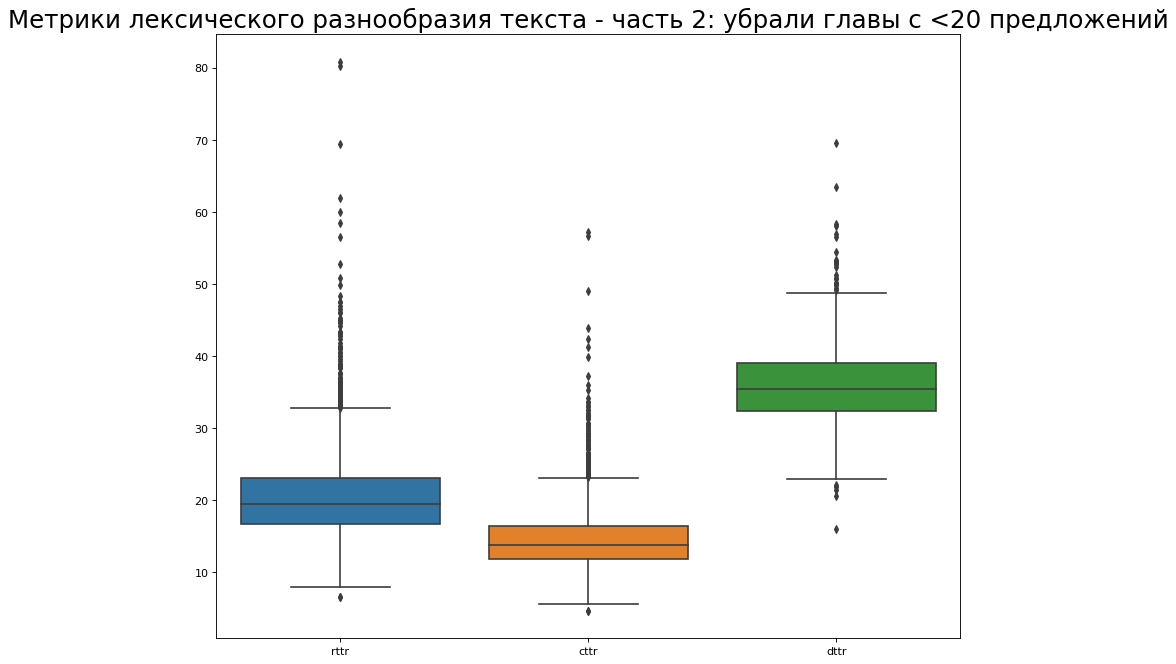

In [29]:
plt.figure(figsize=(12,10), dpi=80)
sns.boxplot(data=books[['rttr', 'cttr', 'dttr']])
plt.title('Метрики лексического разнообразия текста - часть 2: убрали главы с <20 предложений', fontsize=22)
plt.show()

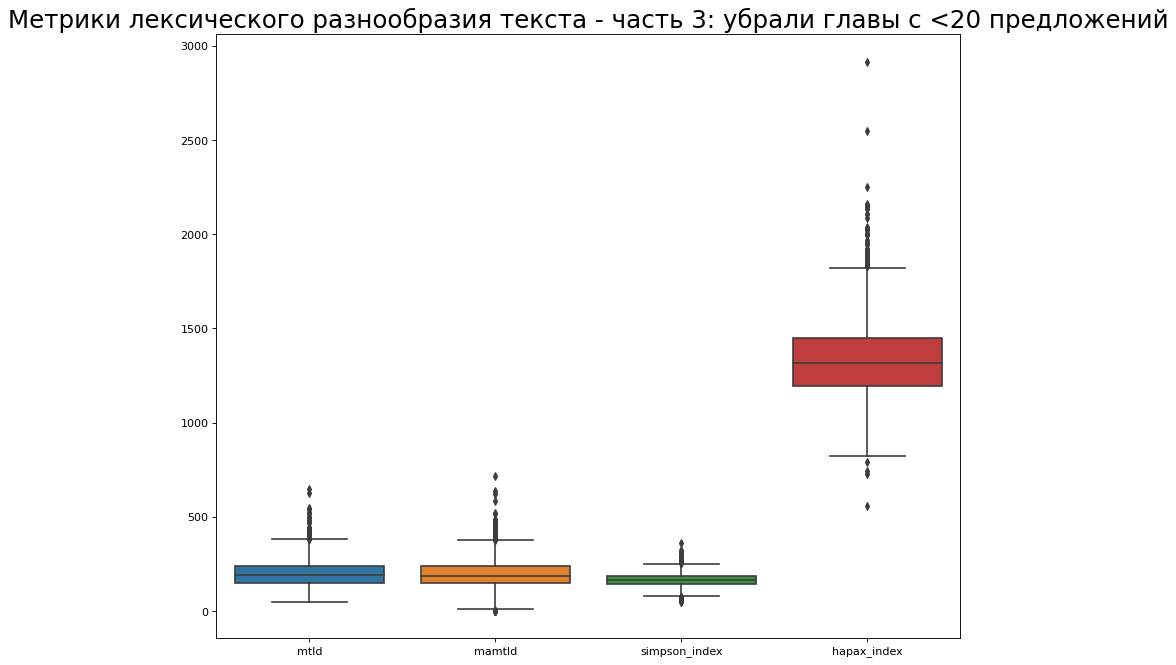

In [30]:
plt.figure(figsize=(12,10), dpi=80)
sns.boxplot(data=books[['mtld', 'mamtld', 'simpson_index', 'hapax_index']])
plt.title('Метрики лексического разнообразия текста - часть 3: убрали главы с <20 предложений', fontsize=22)
plt.show()

**Вывод:** выбросы в основном присутсовали в объектах, где очень мало предложений. После того, как мы убрали главы, где меньше 20 предложений (т.е., скорее всего, это аннотации, цитаты и подобное), выбросов стало заметно меньше, но они все равно еще остались.

In [31]:
#Удаляем некоторые метрики
books = books.drop(['n_sents', 'n_words', 'n_unique_words', 'n_long_words',
       'n_complex_words', 'n_simple_words', 'n_monosyllable_words',
       'n_polysyllable_words', 'n_chars', 'n_letters', 'n_spaces',
       'n_syllables', 'n_punctuations', 'Unnamed: 20'], axis=1)

## Часть 2: Поведение признаков и связь с целевой переменной

Для начала придется закодировать целевую переменную - автора, т.к. сейчас это единственный категориальный столбец.

In [32]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

encoder = OrdinalEncoder()
books['author_num'] = encoder.fit_transform(np.array(books['author']).reshape(-1,1))

In [33]:
books['author_num'].value_counts()

5.0    708
2.0    268
4.0    254
7.0    150
0.0    103
1.0     93
3.0     54
6.0     40
8.0     27
Name: author_num, dtype: int64

In [34]:
books.describe()

,flesch_kincaid_grade,flesch_reading_easy,coleman_liau_index,smog_index,automated_readability_index,lix,femn,masc,neut,plur,...,mamtld,hdd,simpson_index,hapax_index,1per,2per,futr,past,pssv,author_num
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,...,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,7.957435,56.289138,5.132447,14.111922,5.132447,60.128977,0.152579,0.222556,0.076888,0.114698,...,198.340166,0.904978,166.369074,1335.159620,0.034194,0.018569,0.011469,0.107866,0.006643,4.038303
std,4.318972,14.998961,3.395828,4.001983,3.395828,9.994831,0.047910,0.052780,0.023180,0.035809,...,79.175207,0.018490,36.404057,218.295232,0.025633,0.015750,0.008131,0.032911,0.004399,1.920979
min,-1.860860,-26.359599,-5.542377,3.391642,-5.542377,32.287870,0.029703,0.067449,0.007752,0.021505,...,1.000000,0.747652,48.918072,555.648792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.020098,47.956847,2.949777,11.519736,2.949777,53.653860,0.118662,0.184721,0.062145,0.090982,...,147.653517,0.896631,143.100191,1195.850815,0.014031,0.006113,0.005945,0.092742,0.003676,2.000000
50%,7.589878,57.252587,4.921296,13.849053,4.921296,59.529370,0.146568,0.222832,0.073991,0.110241,...,187.345722,0.907852,163.304767,1315.486613,0.029024,0.015054,0.010107,0.112296,0.005889,5.000000
75%,10.175312,65.972605,7.059448,16.208827,7.059448,65.624051,0.180067,0.257806,0.088300,0.133702,...,239.600368,0.917132,187.901188,1448.345619,0.050306,0.028061,0.015198,0.130000,0.008753,5.000000
max,35.761984,99.804315,23.046062,34.291641,23.046062,119.343780,0.387059,0.542636,0.228705,0.321856,...,718.113462,0.950874,358.589521,2915.730310,0.152493,0.116071,0.068269,0.198142,0.058824,8.000000


### 2.1 Корреляции признаков

Все признаки точно не придется одновременно использовать, потому что многие из них слишком похожи. Посмотрим на корреляции и уберем одинаковые.

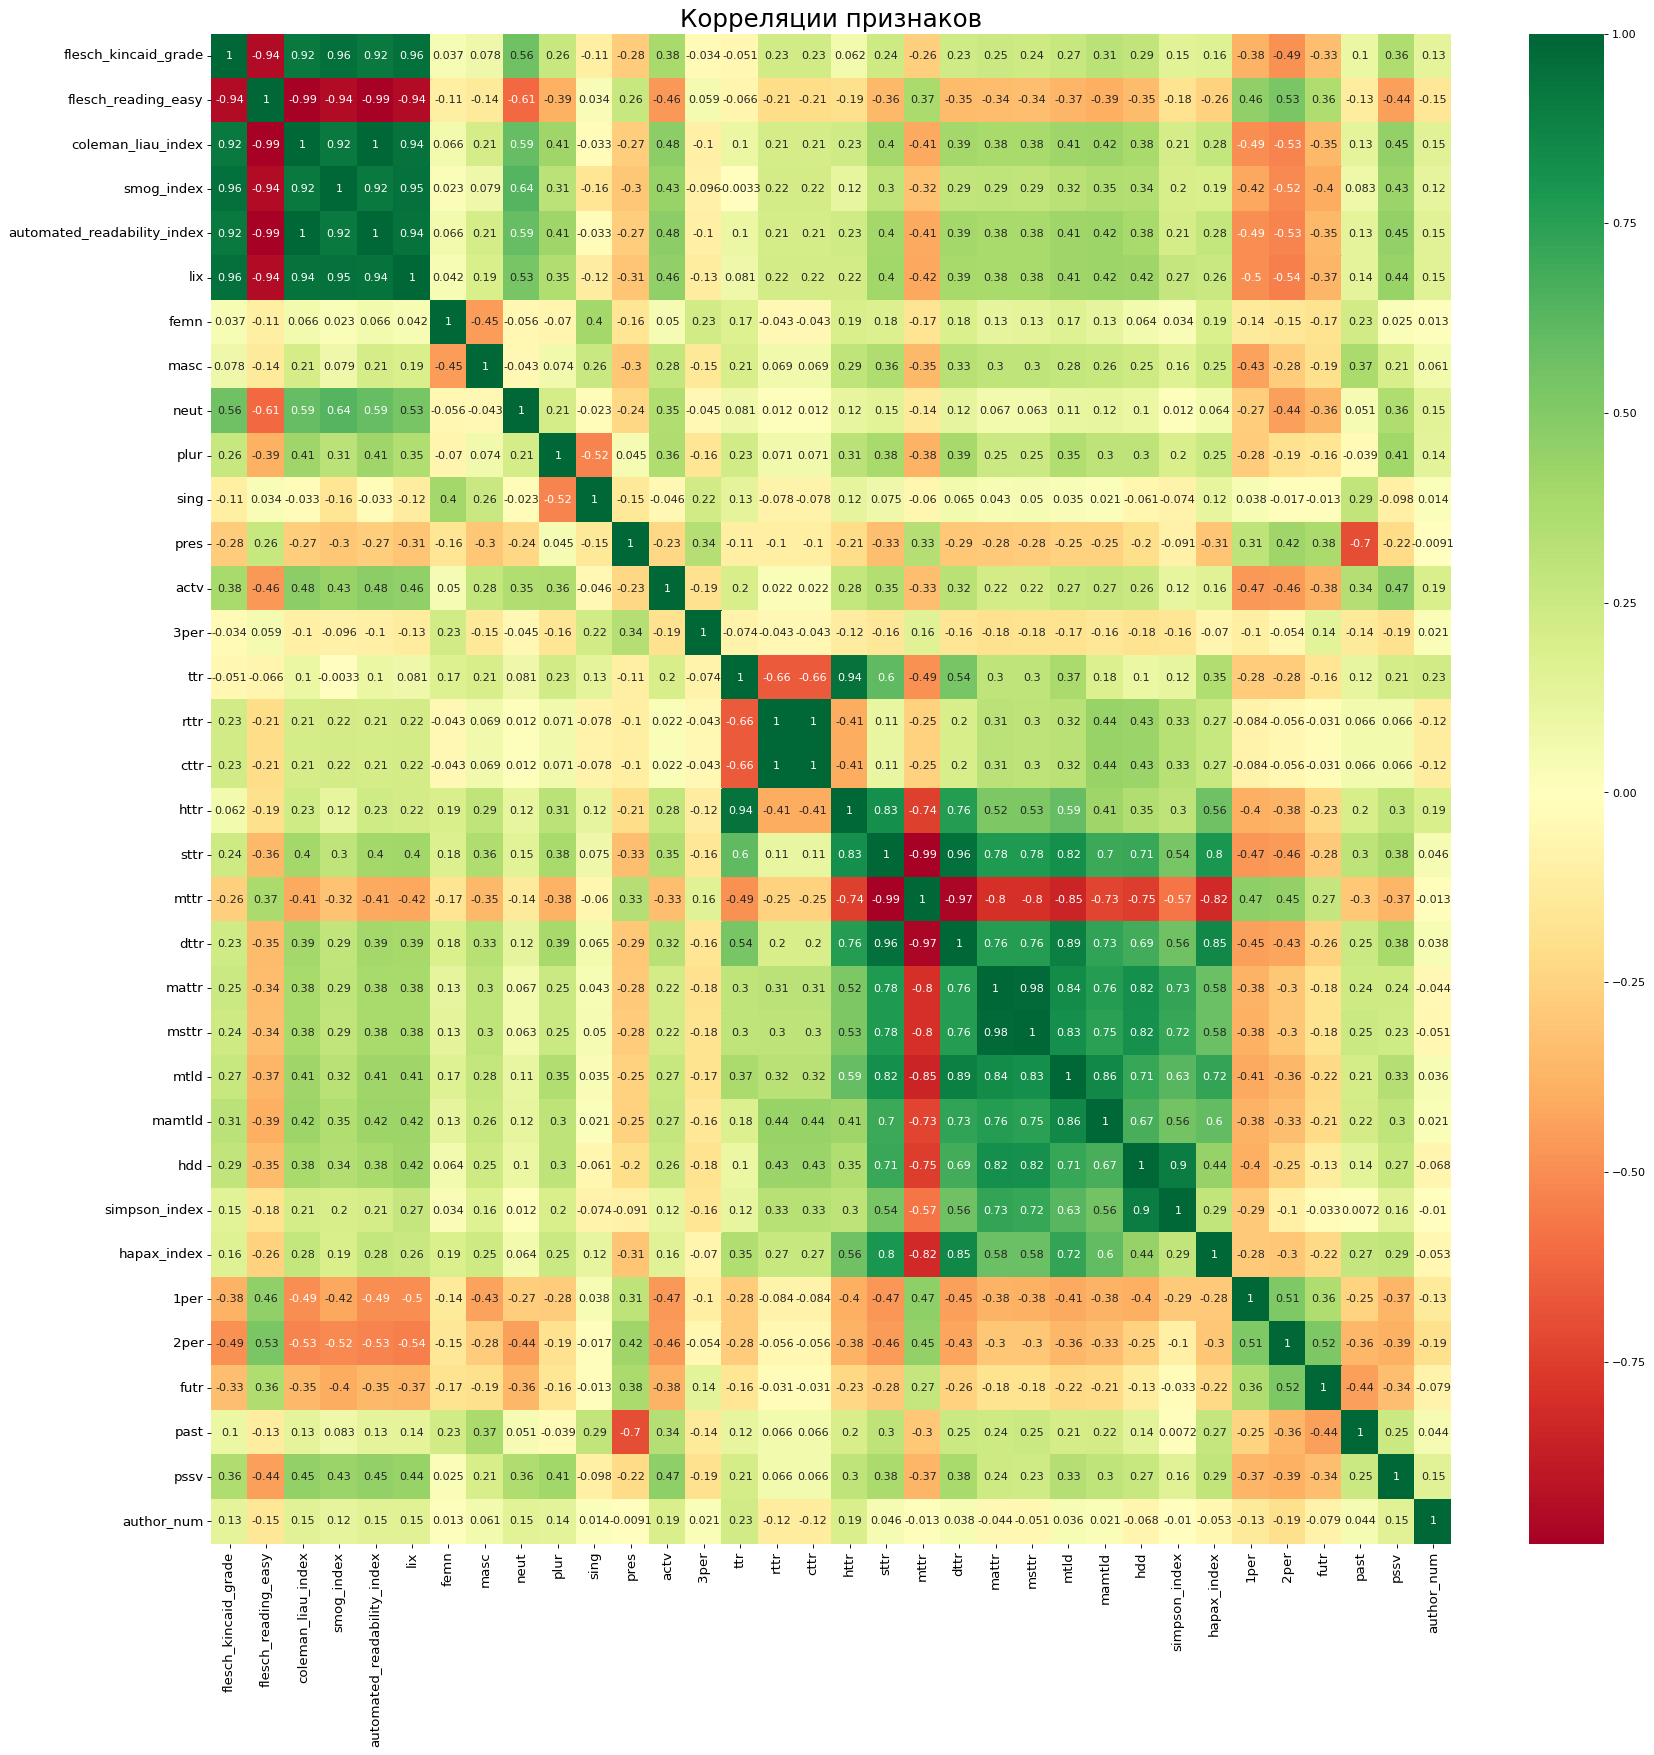

In [35]:
plt.figure(figsize=(25,25), dpi= 80)
sns.heatmap(books.corr(), xticklabels=books.corr().columns, yticklabels=books.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляции признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

* Судя по корреляциям, **метрики удобочитаемости текста** дают очень похожие результаты между собой, поэтому есть смысл оставить только какую-либо одну вместо всех. Можно оставить только **smog_index**. Чем больше значение этой метрики, тем сложнее текст.

* Также метрики лексического разнообразия похожи между собой, но среди них есть не только совсем одинаковые. Можно оставить такие:
  * **hdd** Наиболее достоверная реализация алгоритма VocD (2010, McCarthy & Jarvis). В основе алгоритм лежит метод случайного отбора из текста сегментов длиной от 32 до 50 слов и вычисления для них TTR с последующим усреднением.
  * **mttr** Модификация метрики TTR с использованием логарифмической функции (1966, Mass). Наиболее стабильная метрика в отношении длины текста.



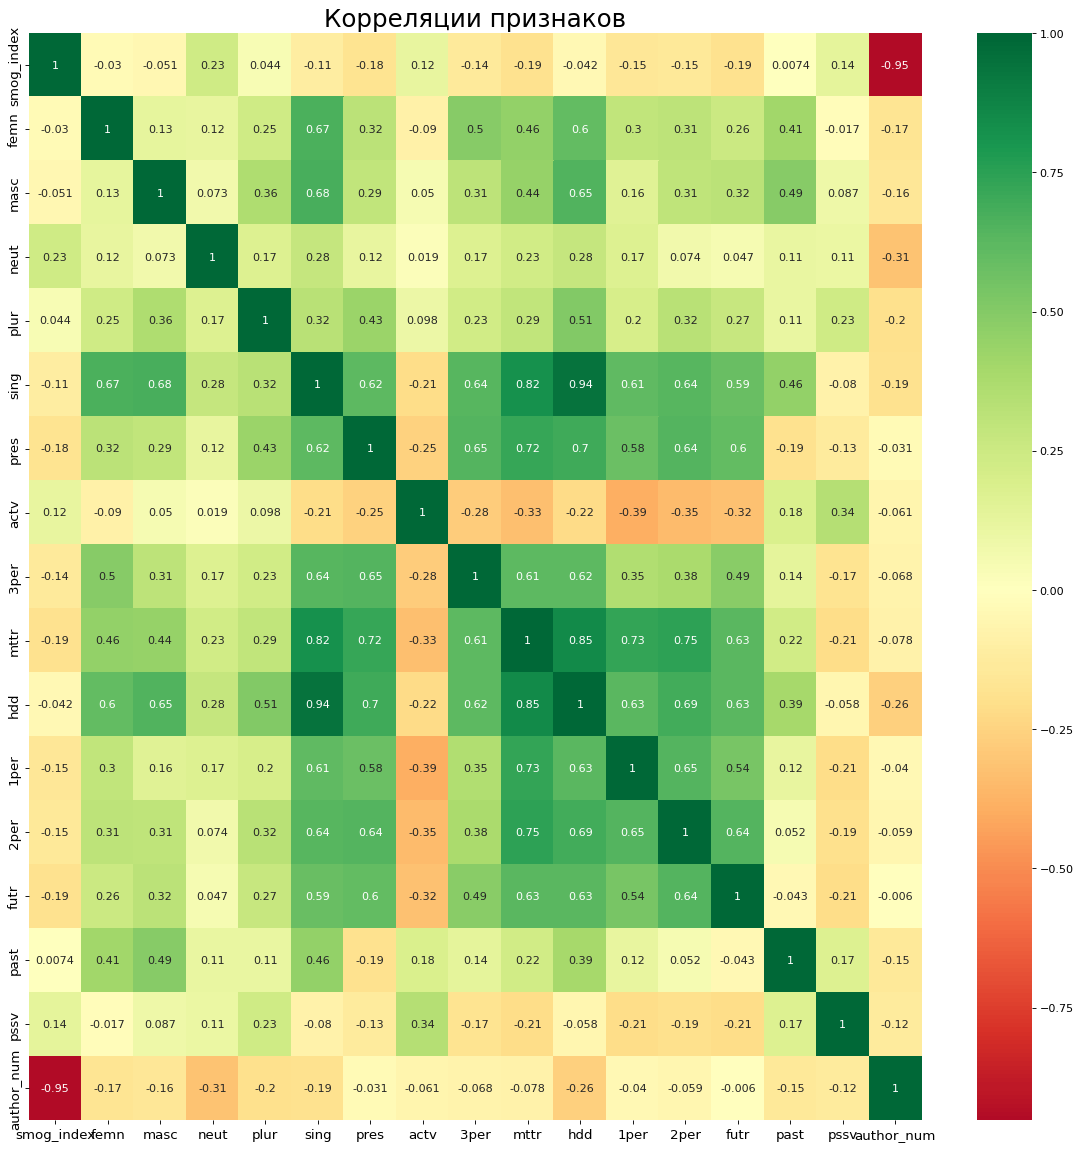

In [36]:
#Удалим ненужные столбцы
books = books.drop(['flesch_kincaid_grade', 'flesch_reading_easy', 'coleman_liau_index', 'automated_readability_index',
                    'ttr', 'rttr', 'cttr', 'httr', 'sttr', 'dttr', 'mattr', 'msttr', 'mamtld', 'hapax_index', 'mtld', 
                    'simpson_index', 'lix'], axis=1)

authors_data = books['author']
books_norm = books.drop(['author'], axis=1)
#Нормируем векторы
books_norm = books_norm.apply(lambda metric: metric/metric.sum(), axis=1)

#Еще раз посмотрим на корреляции
plt.figure(figsize=(18,18), dpi= 80)
sns.heatmap(books_norm.corr(), xticklabels=books_norm.corr().columns, yticklabels=books_norm.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляции признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 2.1 Поведение каждого признака в отдельности

In [37]:
def metrics_density_by_author(m):
  sns.set(rc={'figure.figsize':(15,10)})
  for author in books['author'].unique():
    snsplot = sns.kdeplot(books[books['author']==author][m], shade=True, label=author)
    fig = snsplot.get_figure()
    plt.legend()

In [38]:
books.columns

Index(['smog_index', 'femn', 'masc', 'neut', 'plur', 'sing', 'pres', 'actv',
       '3per', 'mttr', 'hdd', 'author', '1per', '2per', 'futr', 'past', 'pssv',
       'author_num'],
      dtype='object')

Теперь рассмотрим распределения признаков отдельно для каждого автора.

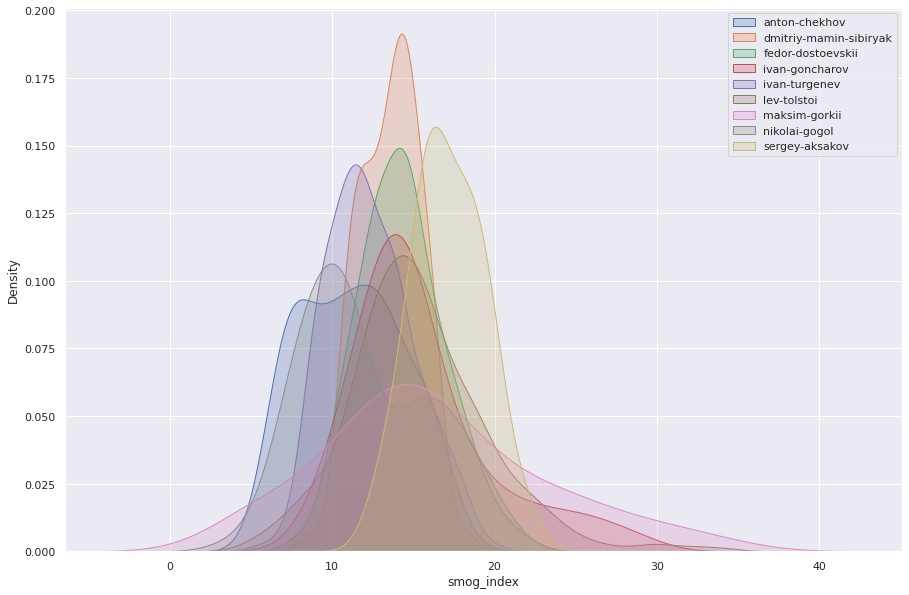

In [39]:
metrics_density_by_author('smog_index')

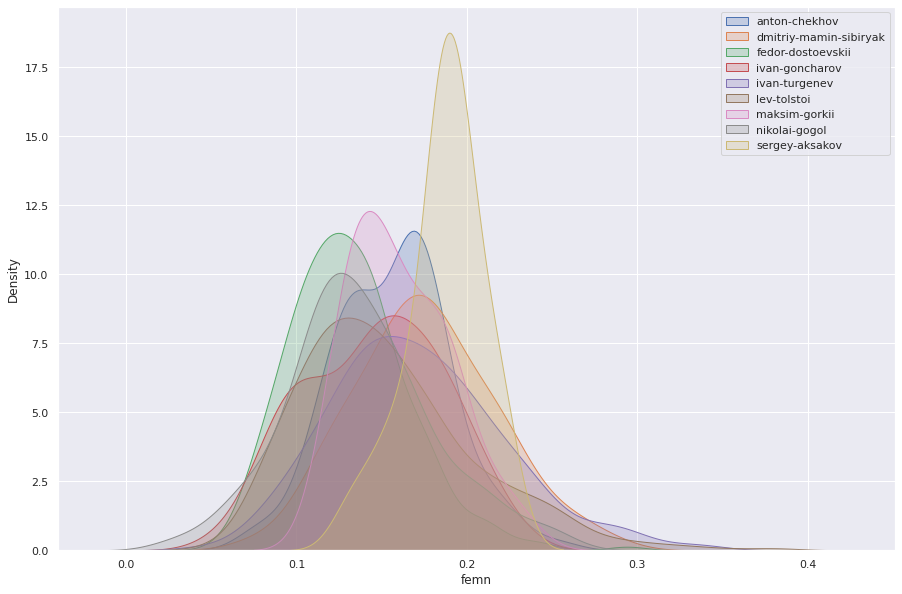

In [40]:
metrics_density_by_author('femn')

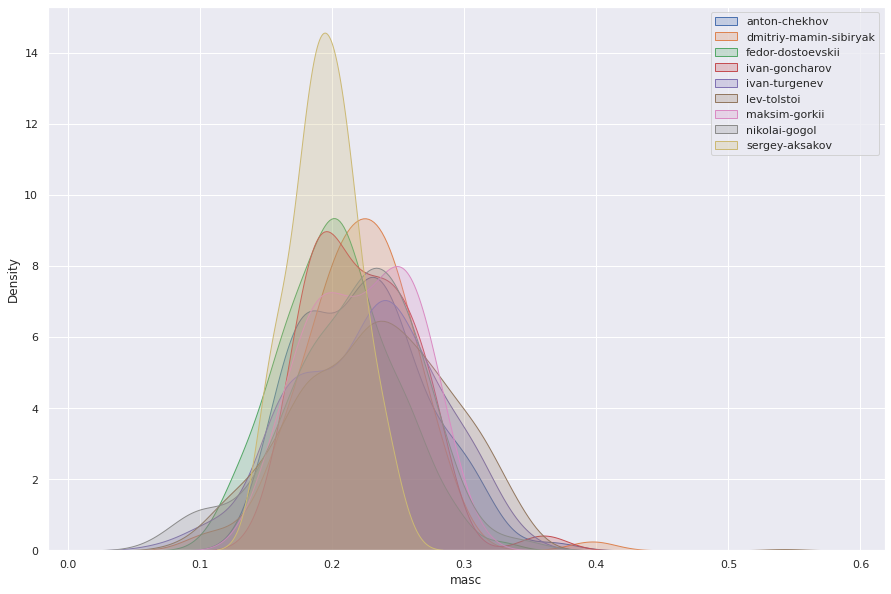

In [41]:
metrics_density_by_author('masc')

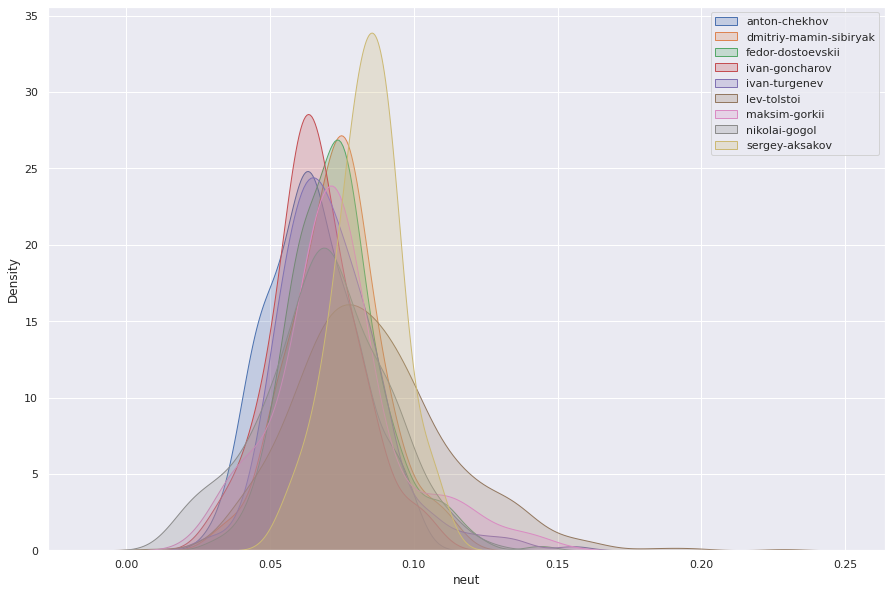

In [42]:
metrics_density_by_author('neut')

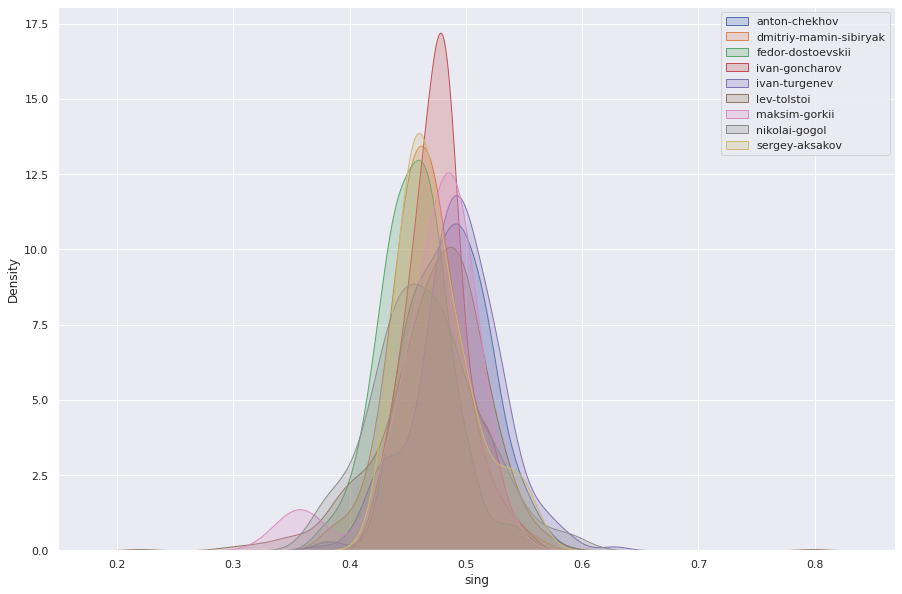

In [43]:
metrics_density_by_author('sing')

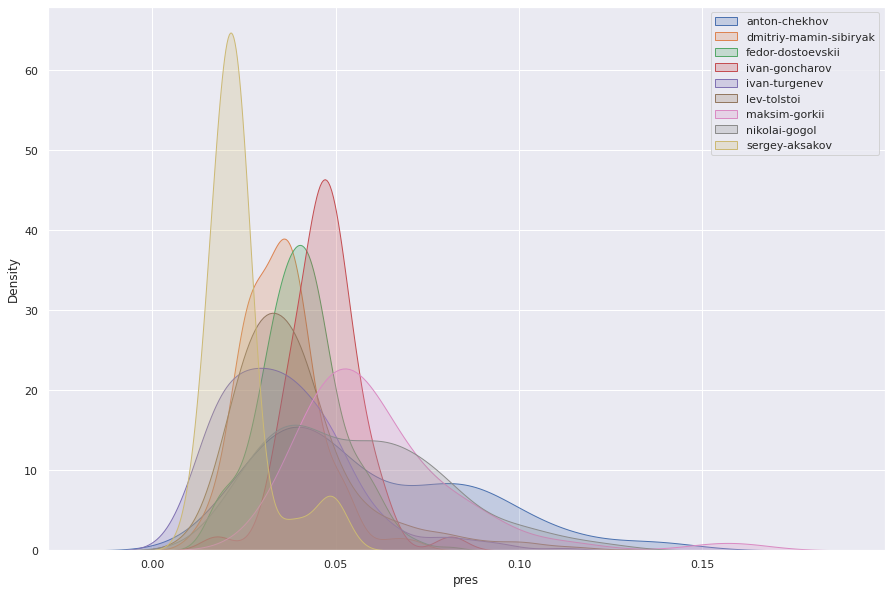

In [44]:
metrics_density_by_author('pres')

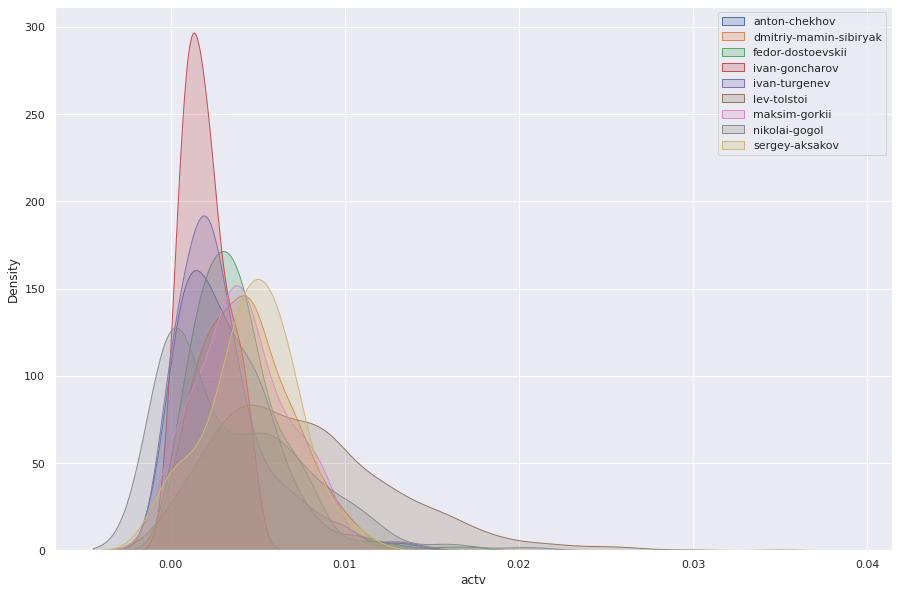

In [45]:
metrics_density_by_author('actv')

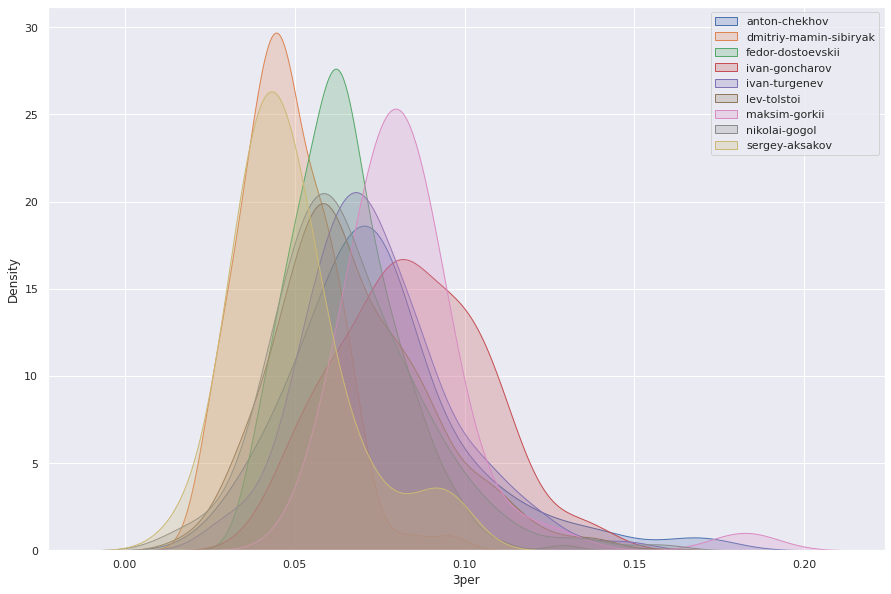

In [46]:
metrics_density_by_author('3per')

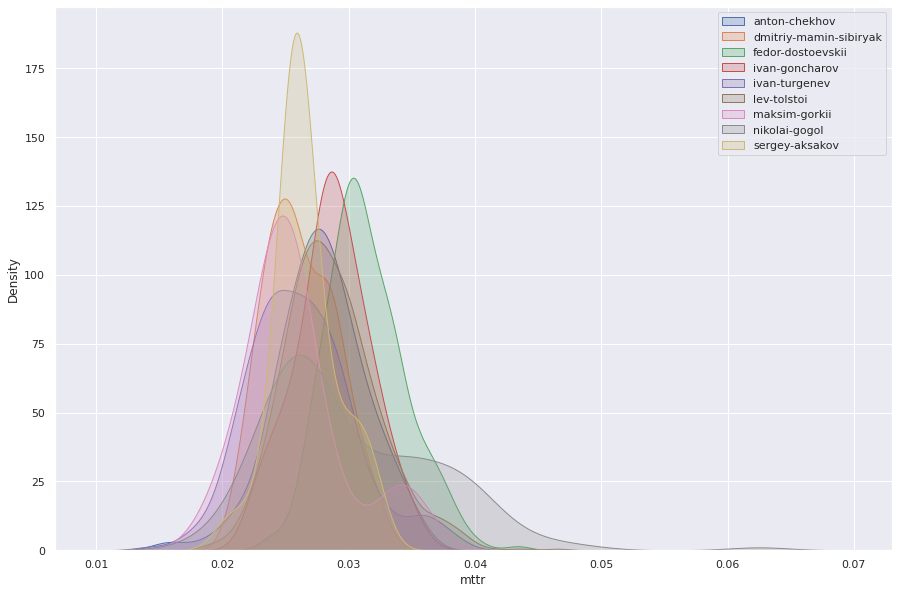

In [47]:
metrics_density_by_author('mttr')

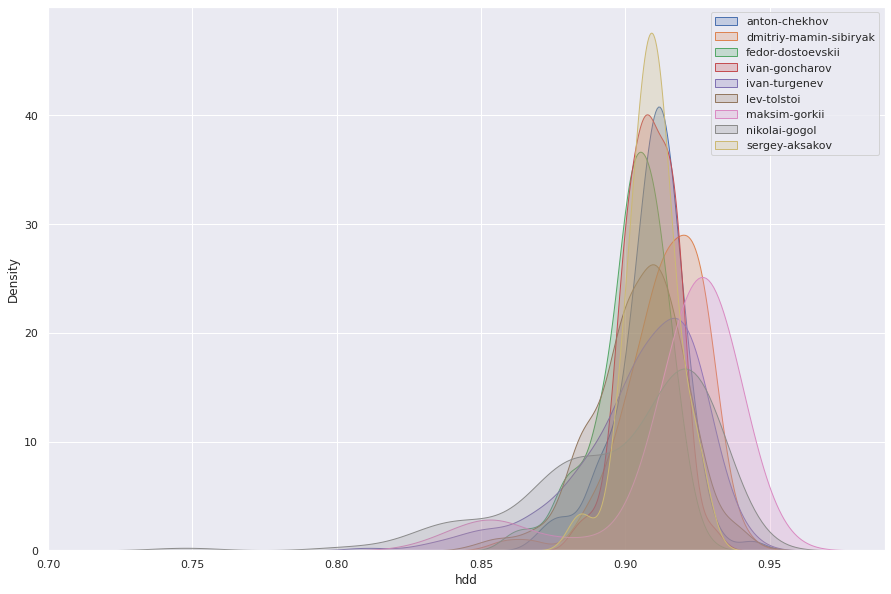

In [48]:
metrics_density_by_author('hdd')

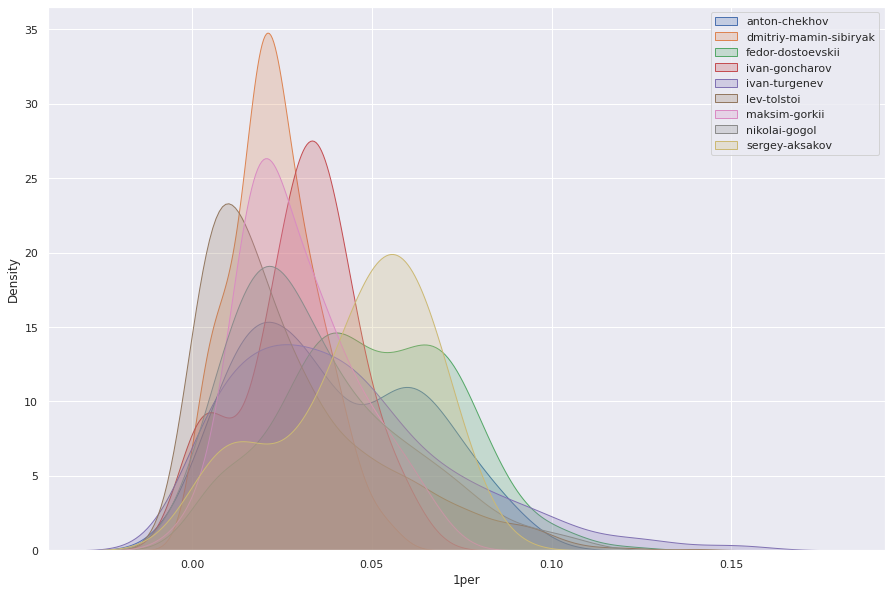

In [49]:
metrics_density_by_author('1per')

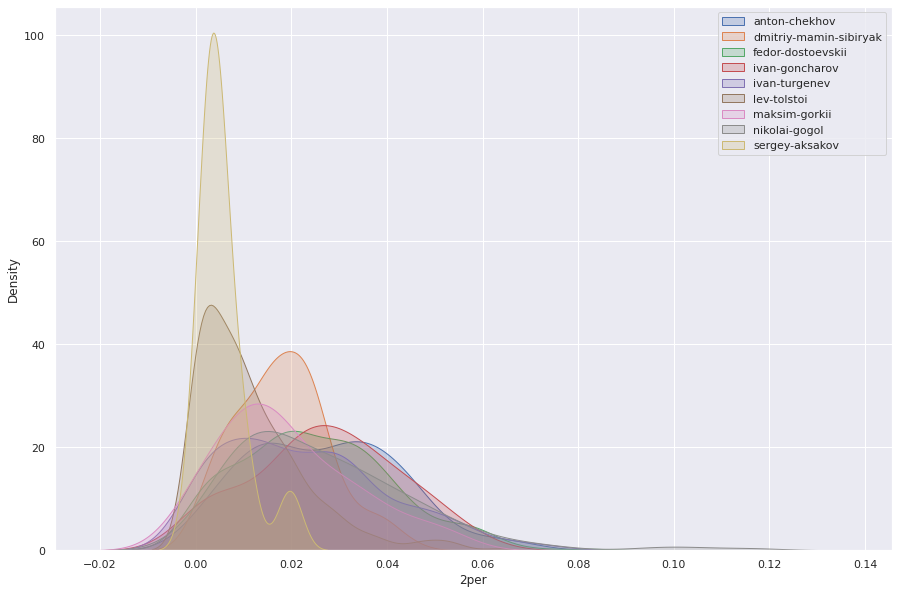

In [50]:
metrics_density_by_author('2per')

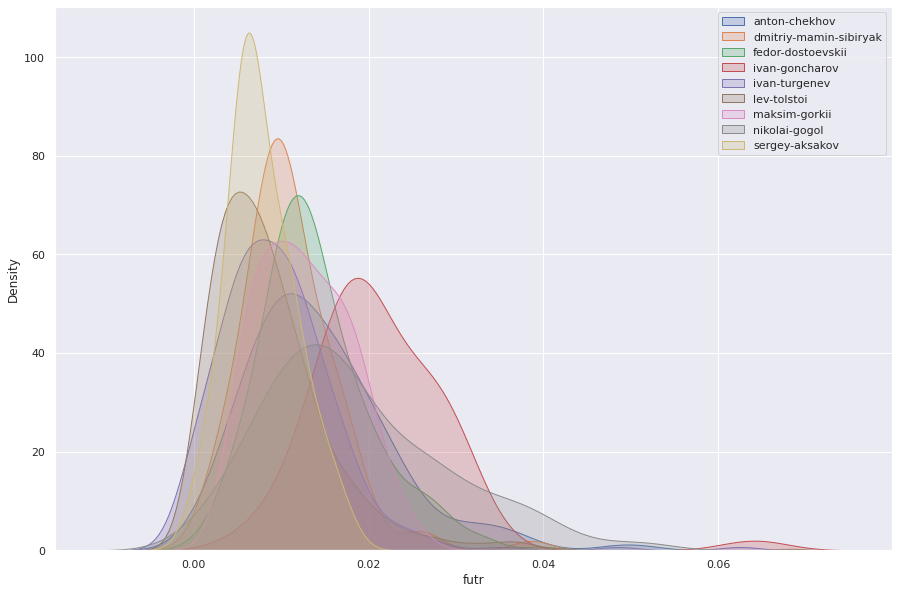

In [51]:
metrics_density_by_author('futr')

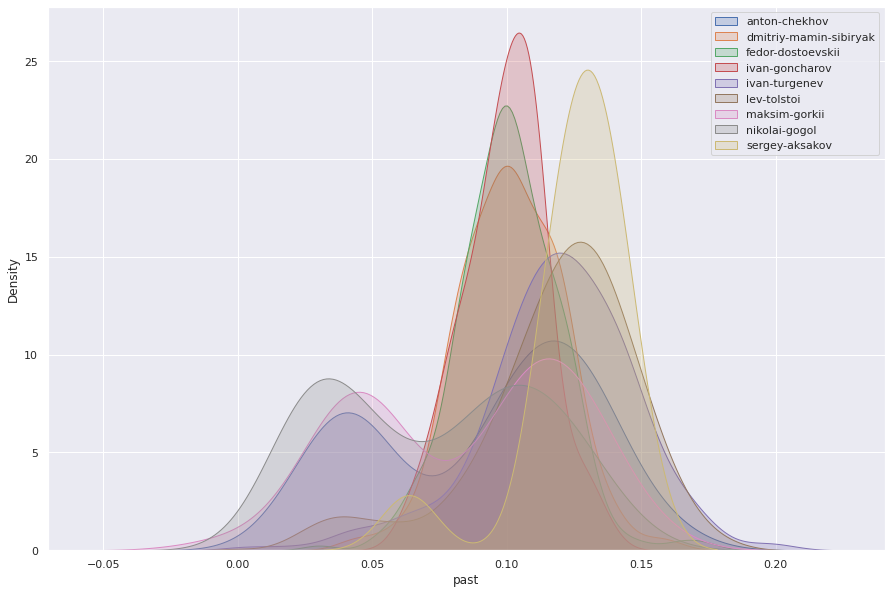

In [52]:
metrics_density_by_author('past')

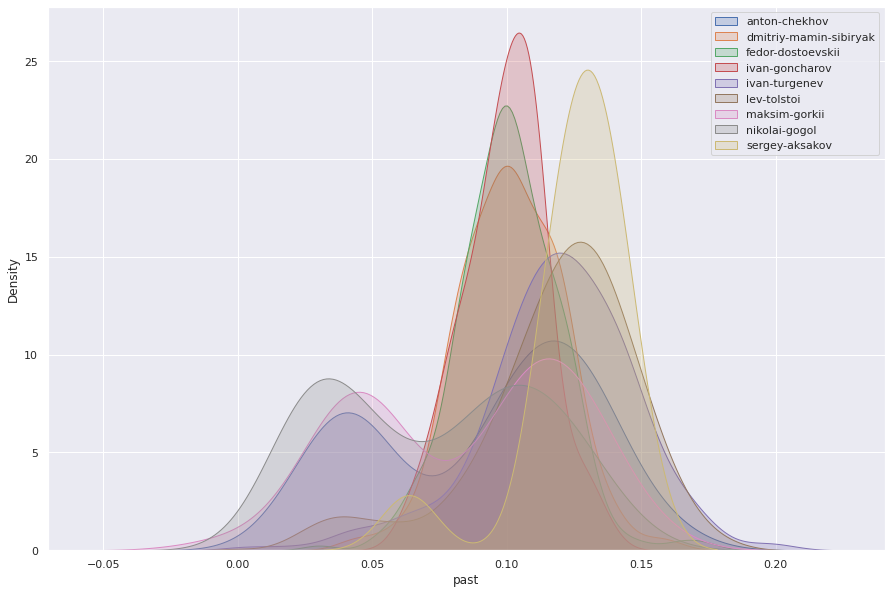

In [53]:
metrics_density_by_author('past')

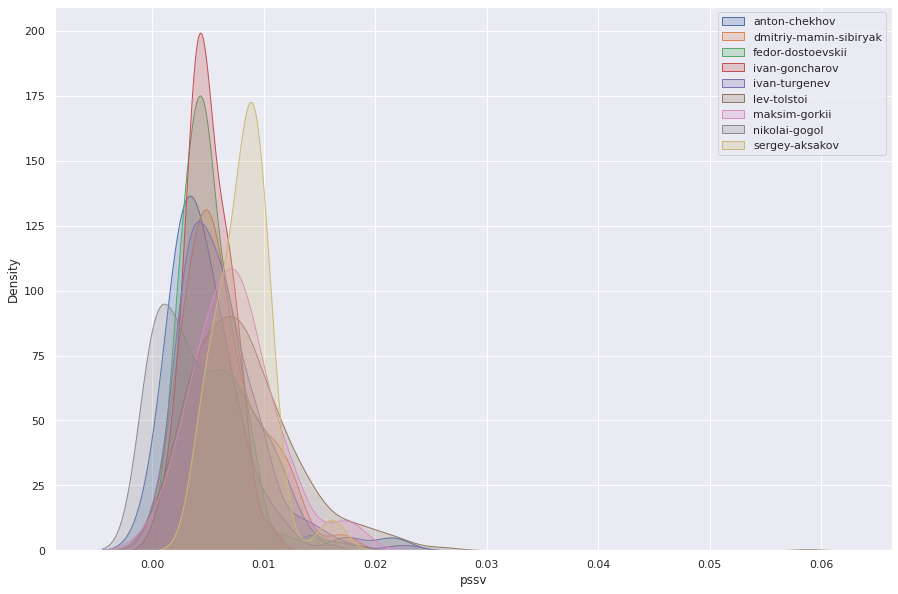

In [54]:
metrics_density_by_author('pssv')

In [61]:
books.drop(['author', 'author_num'], axis=1).columns

Index(['smog_index', 'femn', 'masc', 'neut', 'plur', 'sing', 'pres', 'actv',
       '3per', 'mttr', 'hdd', '1per', '2per', 'futr', 'past', 'pssv'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Авторы')]

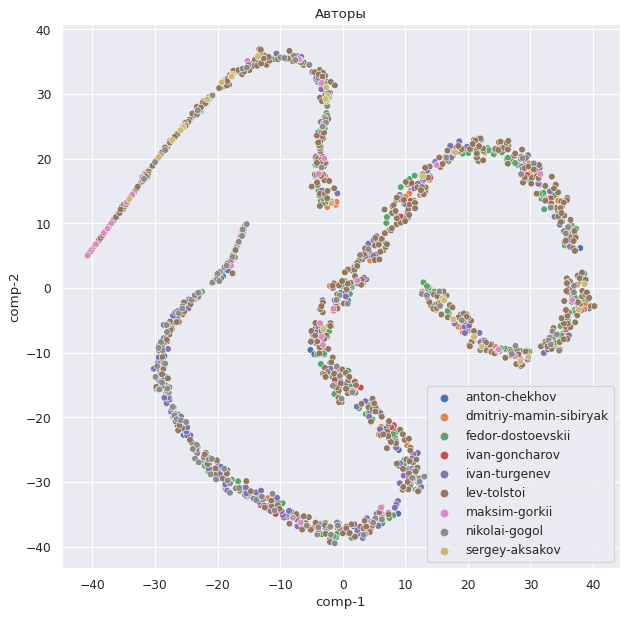

In [60]:
X = books.drop(['author', 'author_num'], axis=1)

y = authors_data

plt.figure(figsize=(9,9), dpi=80)
tsne = TSNE(n_components=2, learning_rate=10)
z = tsne.fit_transform(X)

d = pd.DataFrame()
d["y"] = y
d["comp-1"] = z[:,0]
d["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=d.y.tolist(), data=d).set(title="Авторы") 